# Ayman Obidallah-160397

# Import libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration for training

In [5]:
config = {
    "PATH": '../Machine learning/spambase_train.csv',
    "features": [
        "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_our",
        "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
        "word_freq_receive", "word_freq_will", "word_freq_people",
        "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
        "word_freq_your", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl",
        "word_freq_george", "word_freq_650", "word_freq_labs",
        "word_freq_data", "word_freq_85", "word_freq_technology", "word_freq_1999",
        "word_freq_pm", "word_freq_meeting",
        "word_freq_project", "word_freq_re", "word_freq_edu", 
        "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#",
        "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"
    ],
    "target": "spam",
    "seed": 600,
    "test_size": 0.06,
    "feature_scaling": "standard",
    "n_estimators": 156,
    "random_state": 8
}

# Configuration for test dataset

In [6]:
test_config = {
    "PATHT": '../Machine learning/spambase_test.csv',
    "output_path": '../Machine learning/sample_submission.csv'
}

# Load the training dataset

In [7]:
spam_data = pd.read_csv(config["PATH"])

# Split the dataset into features and target
X = spam_data[config["features"]]
y = spam_data[config["target"]]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=config["test_size"], random_state=config["seed"])

# Feature Scaling

In [8]:
if config["feature_scaling"] == "standard":
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Train the Random Forest model

In [9]:
rf = RandomForestClassifier(n_estimators=config["n_estimators"], random_state=config["random_state"])
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Load the test dataset

In [10]:
test_data = pd.read_csv(test_config["PATHT"])

# Preprocess the test dataset
X_test_submission = test_data[config["features"]]
if config["feature_scaling"] == "standard":
    X_test_submission = scaler.transform(X_test_submission)

# Make predictions on the test dataset
y_test_submission = rf.predict(X_test_submission)

# Create a submission dataframe with ID and spam_prediction columns
submission_df = pd.DataFrame({"ID": test_data["ID"], "spam_prediction": y_test_submission})

# Save the predictions to a submission file
submission_df.to_csv(test_config["output_path"], index=False)

# Plot Confusion Matrix

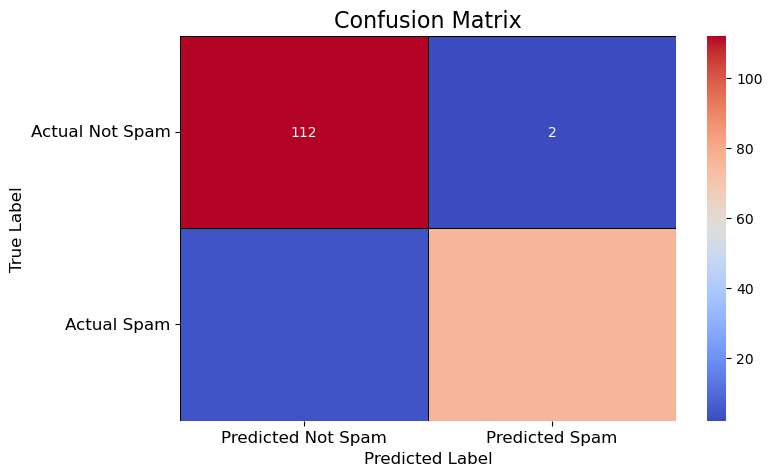

In [11]:
#how many of the predictions were correct and where the model made mistakes.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True,
                 xticklabels=['Predicted Not Spam', 'Predicted Spam'],
                 yticklabels=['Actual Not Spam', 'Actual Spam'],
                 linewidths=.5, linecolor='black')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

# Plot Feature Importances

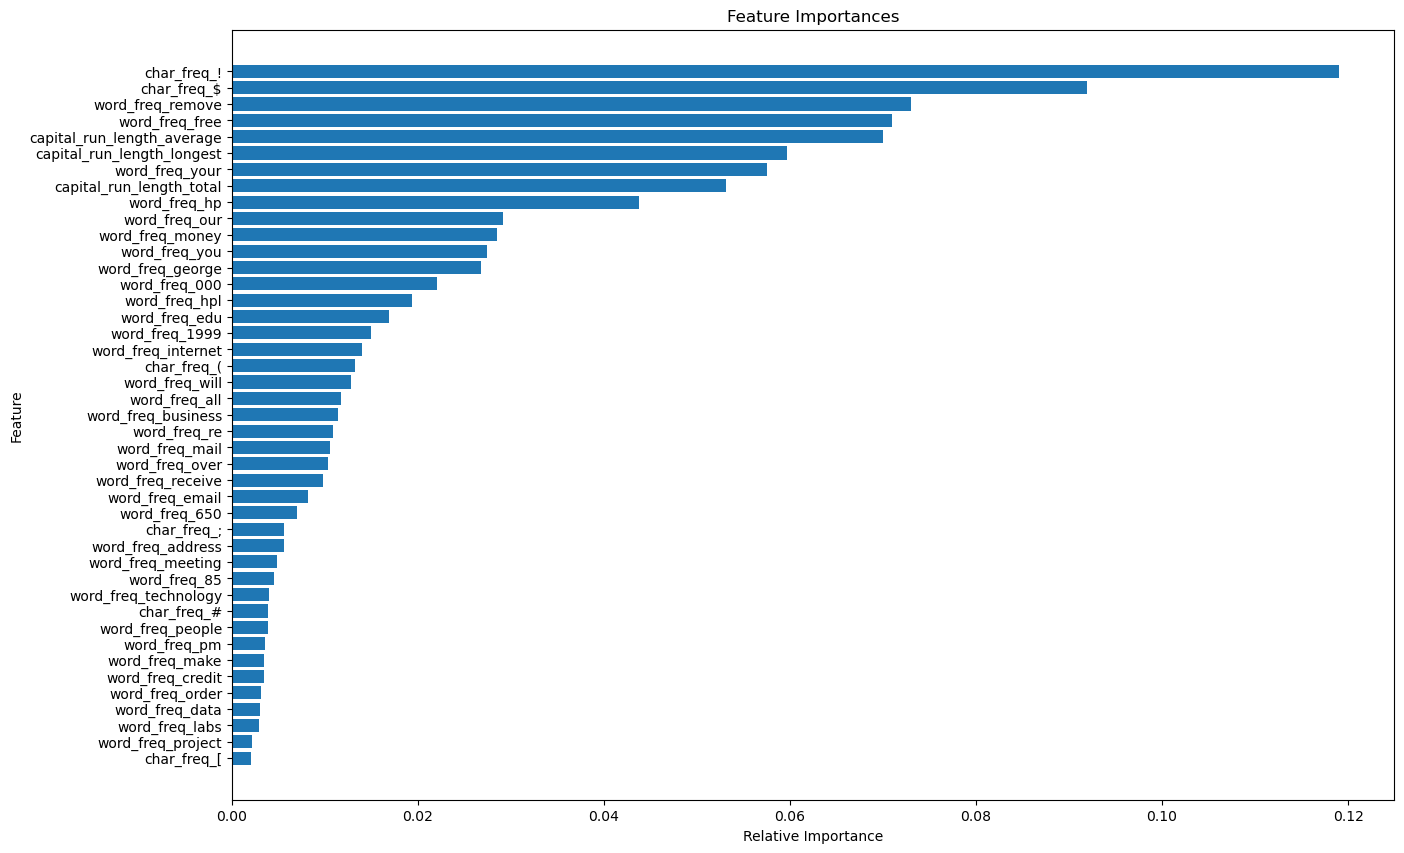

In [12]:
#the relative importance of each feature in making the predictions.
feature_importances = rf.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(15, 10))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [config["features"][i] for i in sorted_indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

# Print classification report and accuracy

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       114
           1       0.97      0.95      0.96        80

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194

